In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

%matplotlib inline

In [9]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [10]:
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [61]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl,s=20)

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:], df.iloc[:, 0]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5,stratify=y)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [92]:
lda=LDA(n_components=2)
X_train_lda=lda.fit_transform(X_train_std,y_train)
X_test_lda=lda.transform(X_test_std)

### LogisticRegression

In [41]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='lbfgs',multi_class='ovr')
model.fit(X_train_lda,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

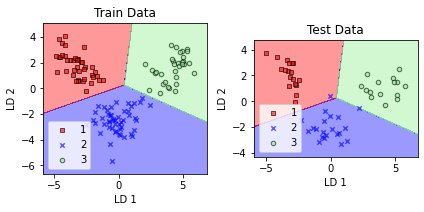

In [96]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1,aspect='equal')
plot_decision_regions(X_train_lda, y_train,model)

plt.title('Train Data')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')


plt.subplot(1,2,2,aspect='equal')
plot_decision_regions(X_test_lda, y_test,model)

plt.title('Test Data')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')


plt.tight_layout()
plt.show()

In [97]:
print('Logistic Regression accuracy on Train Data->',model.score(X_train_lda, y_train))
print('Logistic Regression accuracy on Test Data->',model.score(X_test_lda, y_test))

Logistic Regression accuracy on Train Data-> 1.0
Logistic Regression accuracy on Test Data-> 0.9814814814814815


### SVC+LDA

In [76]:
from sklearn.svm import SVC

In [83]:
svc=SVC(C=1.0,kernel='linear')

svc.fit(X_train_lda,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

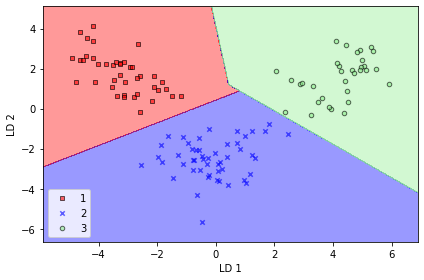

In [84]:
plot_decision_regions(X_train_lda, y_train,svc)


plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

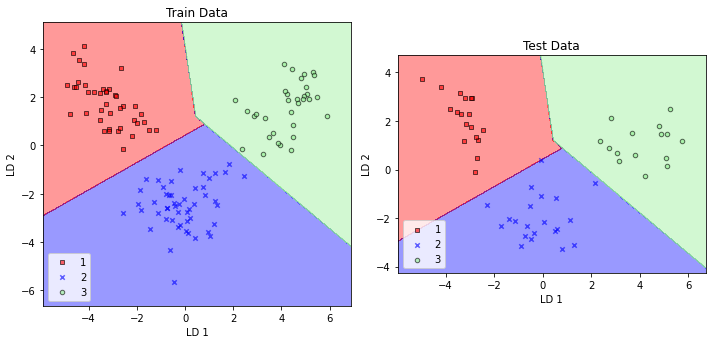

In [100]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1,aspect='equal')
plot_decision_regions(X_train_lda, y_train,svc)

plt.title('Train Data')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')


plt.subplot(1,2,2,aspect='equal')
plot_decision_regions(X_test_lda, y_test,svc)

plt.title('Test Data')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')


plt.tight_layout()
plt.show()

In [99]:
print('SVC accuracy on Train Data->',svc.score(X_train_lda, y_train))
print('SVC accuracy on Test Data->',svc.score(X_test_lda, y_test))

SVC accuracy on Train Data-> 1.0
SVC accuracy on Test Data-> 1.0


### Refrences

- https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch05/ch05.ipynb

- https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py